In [14]:
# !pip install libpcap
# !pip install pyshark
# !pip install nest-asyncio
import nest_asyncio
# nest_asyncio.apply()
# __import__('IPython').embed()

In [4]:
from scapy.all import *
import pandas as pd
def pcap_to_df(filename):
    # Load the pcap file using scapy
    packets = rdpcap(filename)

    # Initialize lists to store the data
    timestamps = []
    latencies = []
    jitters = []

    # Iterate over the packets and extract the data
    for packet in packets:
        # Extract the timestamp and calculate the latency
        try:
            if 'UDP' not in packet:
                continue
            timestamps.append(packet.time)
            latencies.append(float(packet.time - packet['UDP'].time))

            # Calculate the jitter
            if len(jitters) > 0:
                jitters.append(float(abs(latencies[-1] - latencies[-2])))
            else:
                jitters.append(0)
        except:
            pass

    # Create a pandas DataFrame from the data
    df = pd.DataFrame({'timestamp': timestamps,  'jitter': jitters}) #'latency': latencies,
    return df

In [5]:
df = pcap_to_df("without/tcpdump_output_1.pcap")
df

,timestamp,jitter
0,1680211836.962052,0.000000
1,1680211836.962119,0.000934
2,1680211836.962182,0.000940
3,1680211836.962226,0.000953
4,1680211836.962303,0.000922
...,...,...
17762,1680211856.735774,0.000999
17763,1680211856.735776,0.000002
17764,1680211856.735778,0.001000
17765,1680211856.735780,0.000002


<AxesSubplot:>

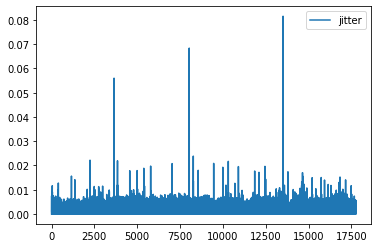

In [6]:
df.plot()

In [18]:
from scapy.all import *
import pandas as pd

def pcap_to_df(filename):
    # Load the pcap file using scapy
    packets = rdpcap(filename)

    # Initialize lists to store the data
    timestamps = []
    latencies = []
    jitters = []

    # Iterate over the packets and extract the data
    prev_packet_time = None
    first_packet_time = None
    for packet in packets:
        # Extract the timestamp and calculate the latency
        try:
            if 'UDP' not in packet:
                continue

            if first_packet_time is None:
                first_packet_time = packet.time

            normalized_time = packet.time - first_packet_time
            

            if prev_packet_time is not None:
                latency = float(normalized_time - prev_packet_time)
                latencies.append(latency)
                timestamps.append(normalized_time)
                # Calculate the jitter
                if len(jitters) > 0:
                    jitters.append(float(abs(latency - latencies[-2])))
                else:
                    jitters.append(0)

            prev_packet_time = normalized_time
        except:
            pass
#     print({'timestamp': timestamps, 'jitter': jitters})
    print(len(timestamps),len(jitters))
    # Create a pandas DataFrame from the data
    df = pd.DataFrame({'timestamp': timestamps, 'jitter': jitters})
    return df

# The rest of the code remains the same
def process_multiple_pcaps(file_list):
    df_list = []
    for filename in file_list:
        df = pcap_to_df(filename)
        df.plot()
        df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df



17766 17766
17701 17701
17732 17732
17737 17737
17632 17632
17783 17783
17667 17667
17701 17701
17732 17732
17692 17692


,timestamp,jitter
0,0.000067,0.000000
1,0.000130,0.000004
2,0.000174,0.000019
3,0.000251,0.000033
4,0.000270,0.000058


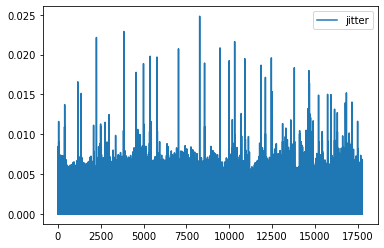

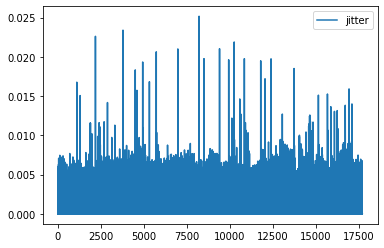

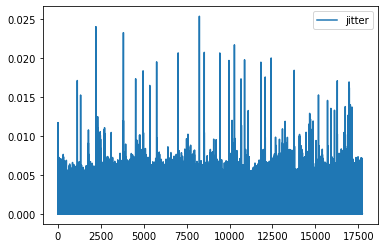

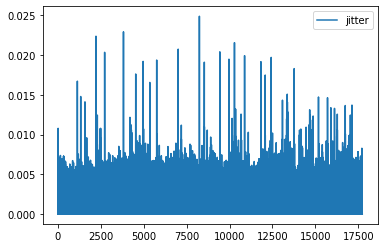

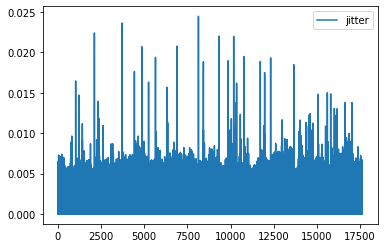

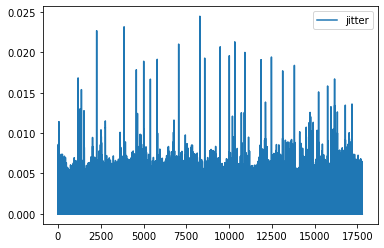

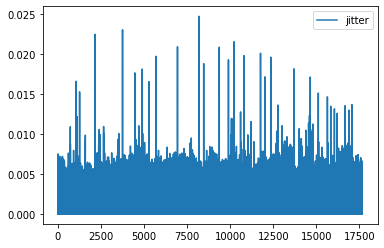

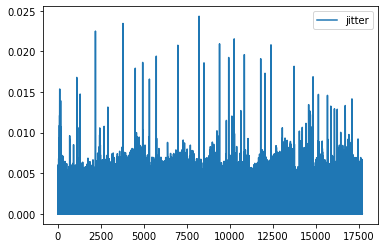

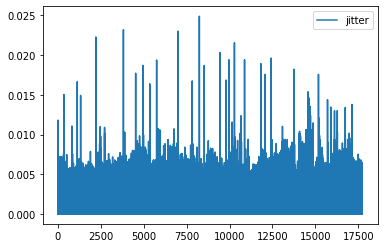

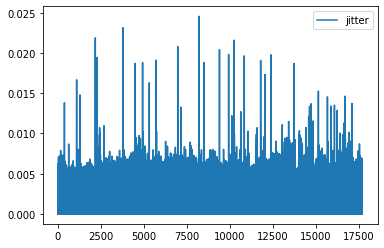

In [19]:
# Example usage
file_list = ['without/tcpdump_output_{}.pcap'.format(i) for i in range(1, 11)]
combined_df = process_multiple_pcaps(file_list)
combined_df.head()

<AxesSubplot:>

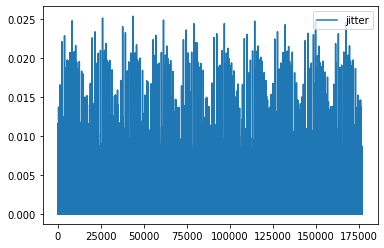

In [20]:
combined_df[combined_df['jitter']<0.05].plot()

In [22]:
import pandas as pd
import numpy as np
from scapy.all import *
import matplotlib.pyplot as plt

def extract_jitter_info(pcap_file):
    packets = rdpcap(pcap_file)
    timestamps = [pkt.time for pkt in packets if pkt.haslayer(UDP)]
    jitter_values = []

    for i in range(1, len(timestamps)):
        jitter_values.append(abs(timestamps[i] - timestamps[i - 1]))

    return jitter_values

pcap_files = ['without/tcpdump_output_{}.pcap'.format(i) for i in range(1, 11)]
jitter_data = {}

for i, file in enumerate(pcap_files):
    jitter_data[f'file_{i + 1}'] = extract_jitter_info(file)




         count unique       top  freq
file_1   17766   2691  0.000002  1697
file_2   17701   2699  0.000002  1691
file_3   17732   2706  0.000002  1704
file_4   17737   2721  0.000002  1703
file_5   17632   2649  0.000002  1782
file_6   17783   2741  0.000002  1691
file_7   17667   2653  0.000002  2196
file_8   17701   2726  0.000002  1907
file_9   17732   2739  0.000002  1923
file_10  17692   2697  0.000002  1897


TypeError: no numeric data to plot

           count      mean       std       min       25%       50%       75%  \
file_1   17766.0  0.001113  0.002347  0.000001  0.000017  0.000036  0.000073   
file_2   17701.0  0.001121  0.002352  0.000001  0.000017  0.000037  0.000077   
file_3   17732.0  0.001105  0.002335  0.000001  0.000017  0.000035  0.000070   
file_4   17737.0  0.001118  0.002359  0.000001  0.000017  0.000036  0.000071   
file_5   17632.0  0.001102  0.002319  0.000001  0.000017  0.000035  0.000069   
file_6   17783.0  0.001103  0.002314  0.000001  0.000017  0.000036  0.000078   
file_7   17667.0  0.001103  0.002322  0.000001  0.000016  0.000033  0.000068   
file_8   17701.0  0.001106  0.002329  0.000001  0.000016  0.000034  0.000072   
file_9   17732.0  0.001101  0.002324  0.000001  0.000016  0.000035  0.000071   
file_10  17692.0  0.001104  0.002327  0.000001  0.000016  0.000033  0.000067   

              max  median  
file_1   0.024838     NaN  
file_2   0.025199     NaN  
file_3   0.025404     NaN  
file_4 

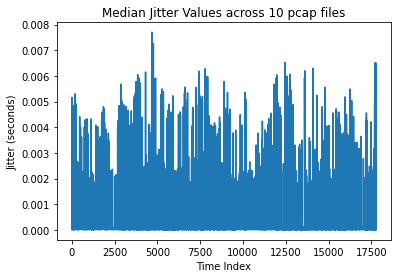

In [27]:
jitter_df = pd.DataFrame.from_dict(jitter_data, orient='index').T
jitter_df = jitter_df.dropna(axis=1, how='all')
display(jitter_df)
# Calculate summary statistics
# summary_stats = jitter_df.describe().T
# display(summary_stats)

# Plot jitter values
jitter_df.plot(kind='box')
plt.title('Jitter Values across 10 pcap files')
plt.ylabel('Jitter (seconds)')
plt.show()